# General settings and definitions

In [20]:
%config InlineBackend.figure_format='retina'
%matplotlib inline
from __future__ import print_function
# Some imports to start playing in python
import mcerp as mc #  Monte Carlo error propagation package
mc.npts = 1000000
import uncertainties as lp #  Linear error propagation
import matplotlib.pyplot as plt
import numpy as np
from math import ceil
from __future__ import print_function
from scipy.stats import norm as g_pdf
from scipy.stats import beta as b_pdf

def make_hist(data, **kwargs):
    content, bnds = np.histogram(data, **kwargs)
    ctrs = bnds[:-1]
    width = bnds[1:] - bnds[:-1]
    content /= np.max(content)
    return content, ctrs, width

def get_interval(a, fraction=0.68, mpv=None):
    ac = a.copy()
    if mpv and not ac[0] <= mpv <= ac[-1]:
        ac = np.append(ac, [mpv])
    ac.sort()
    N = len(ac)
    N_interval = int(ceil(N*fraction))
    up_ac = ac[-(N-N_interval):]
    lo_ac = ac[:len(up_ac)]
    Bp, Bdiff = None, np.infty
    for lo, up in zip(lo_ac, up_ac):
        if up-lo < Bdiff:
            if mpv and lo <= mpv <= up:
                Bp, Bdiff = (lo, up), up - lo
            else:
                Bp, Bdiff = (lo, up), up - lo
    return Bp
    
style1 = {
    'color':'#1868AA',
    'linewidth': 0    
}
style_bar = {
    'color':'#1868AA',
    'edgecolor': '#1868AA'
}
style_bar2 = {
    'color':'#FFD143',
    'linewidth': 3,
}
style1line = {
    'color':'#1868AA',
}
style2 = {
    'color': '#FF6828',
    'linewidth': 4,
    # 'linestyle': '--'
}

# Simply example for a linear function
### Linear error propagation

In [2]:
A, B = lp.correlated_values_norm([(5, 1), (3, 2)], np.array([[1., 0.], [0., 1.0]]))
diff = A - B, A + B
print('{:.2f} +- {:.2f}'.format(diff[0].n, diff[0].s))
print('{:.2f} +- {:.2f}'.format(diff[1].n, diff[1].s))
print(lp.correlation_matrix(diff))

2.00 +- 2.24
8.00 +- 2.24
[[ 1.  -0.6]
 [-0.6  1. ]]


### Monte Carlo error propagation

In [3]:
A, B = mc.N(5, 1), mc.N(3, 2)
diff = A - B, A + B
print('{:.2f} +- {:.2f}'.format(diff[0].mean, diff[0].std))
print( '{:.2f} +- {:.2f}'.format(diff[1].mean, diff[1].std))
print(mc.correlation_matrix(diff))

2.00 +- 2.24
8.00 +- 2.24
[[ 1.         -0.59999934]
 [-0.59999934  1.        ]]


# MC propagation for $\sin(\phi)$ with $\phi=\frac{1}{2}\pi\pm\frac{1}{4}\pi$

0.93 +- 0.10
0.924710696979
(0.92470997253951204, 0.99999999999999245)
(0.92470997253951204, 1.0)


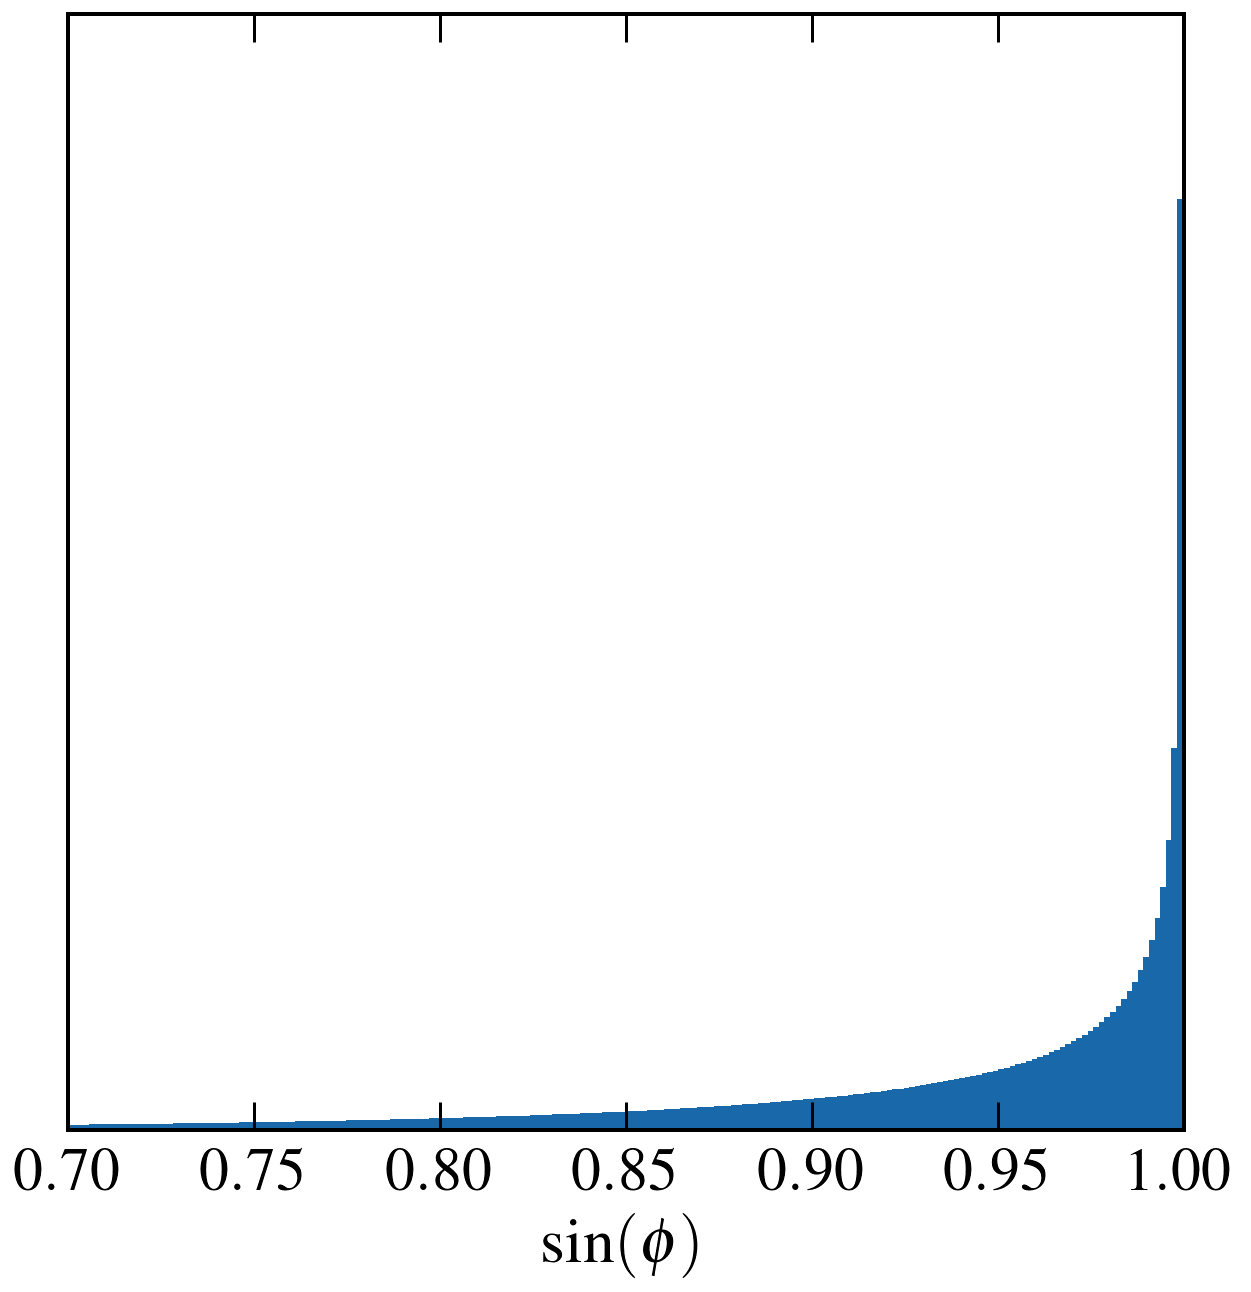

In [4]:
from math import pi, sin
from uncertainties.umath import sin as usin
angle = mc.N(pi/2.,pi/8.)
# angle = mc.N(pi/2.,10.*pi)
import numpy as np
a = lp.ufloat(pi/2., pi/8.)
xs = np.linspace(0.4,1.,1000)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
# ax.fill_between(xs, 0, kde, **style1)
ax.set_yticks([])
sins = mc.umath.sin(angle)
cont, ctrs, width = make_hist((sins)._mcpts, range=(0.7,1.0), bins=200, density=True)
ax.bar(ctrs,cont, width=width, **style_bar);
ax.set_ylim((0,1.2))
ax.set_xlim((0.7,1.0))

print('{:.2f} +- {:.2f}'.format(sins.mean, sins.std))
print(sins.percentile(0.32))
print(get_interval(sins._mcpts))
print(get_interval(sins._mcpts, mpv=1.))


ax.set_xlabel(r'$\sin(\phi)$')
usin(a)
fig.savefig('sin.pdf')

# Efficiency corrected yield

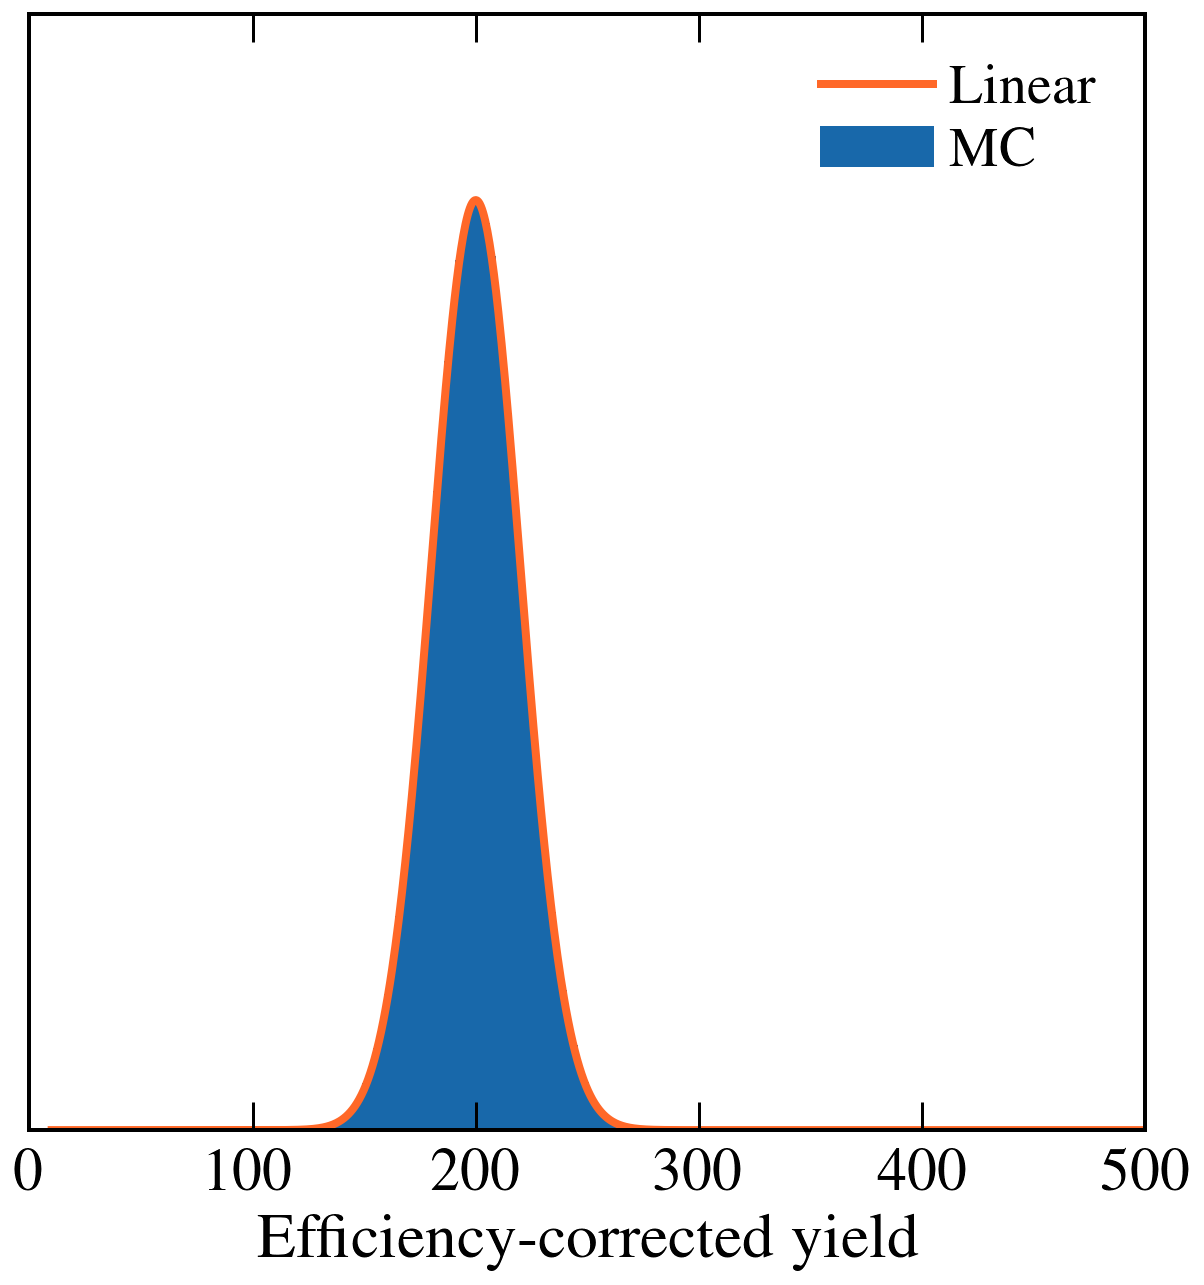

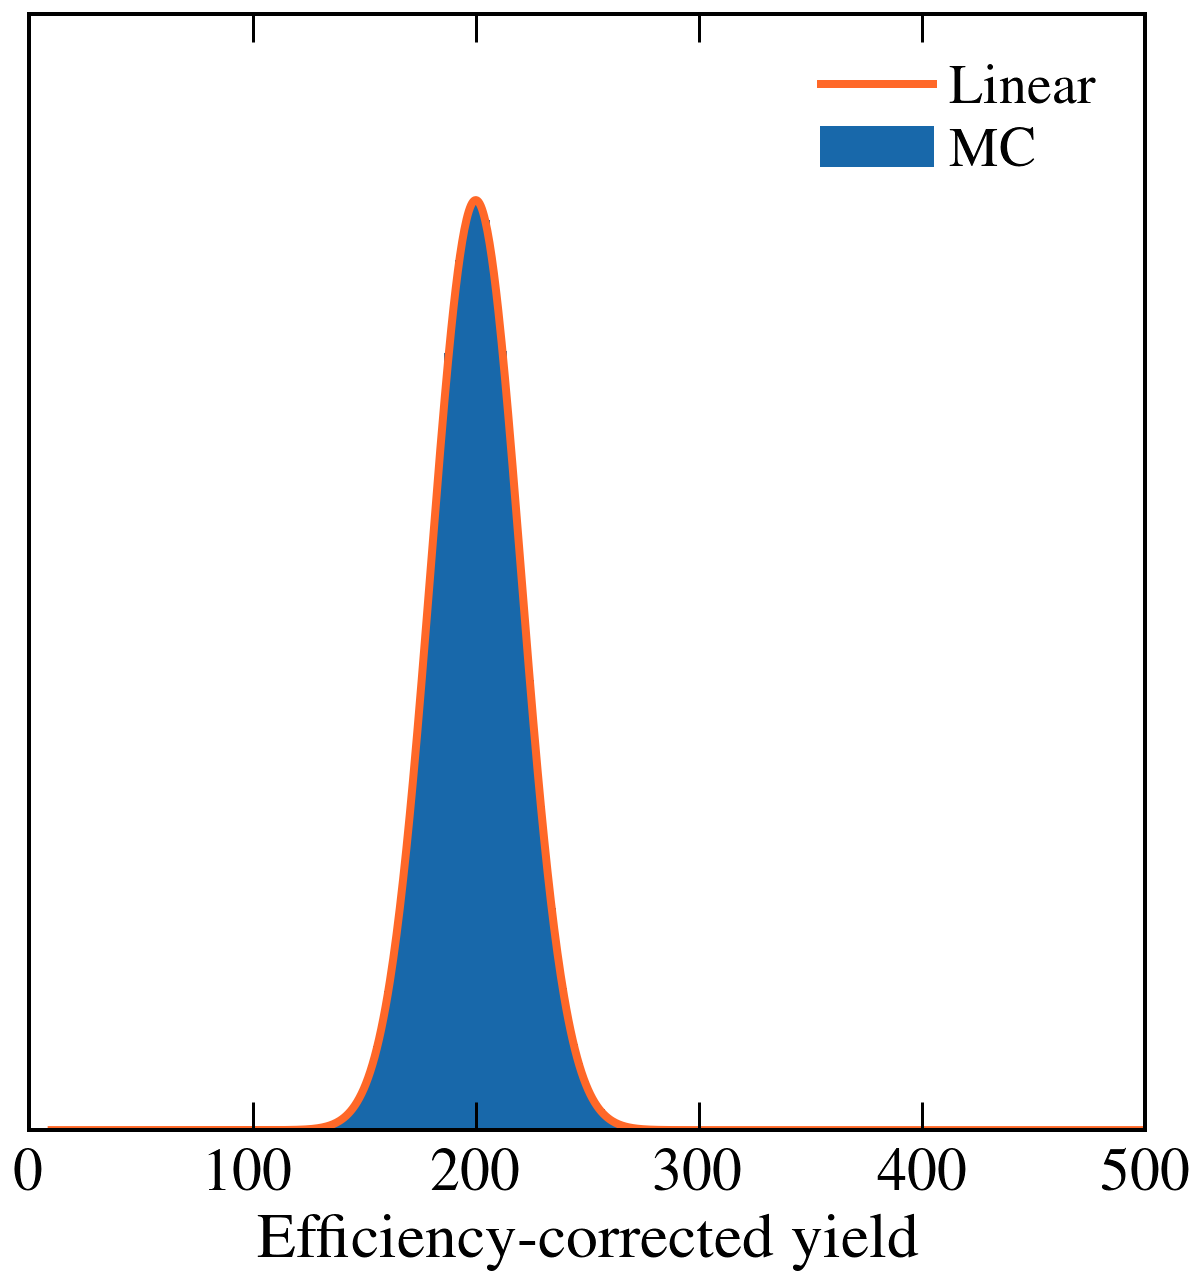

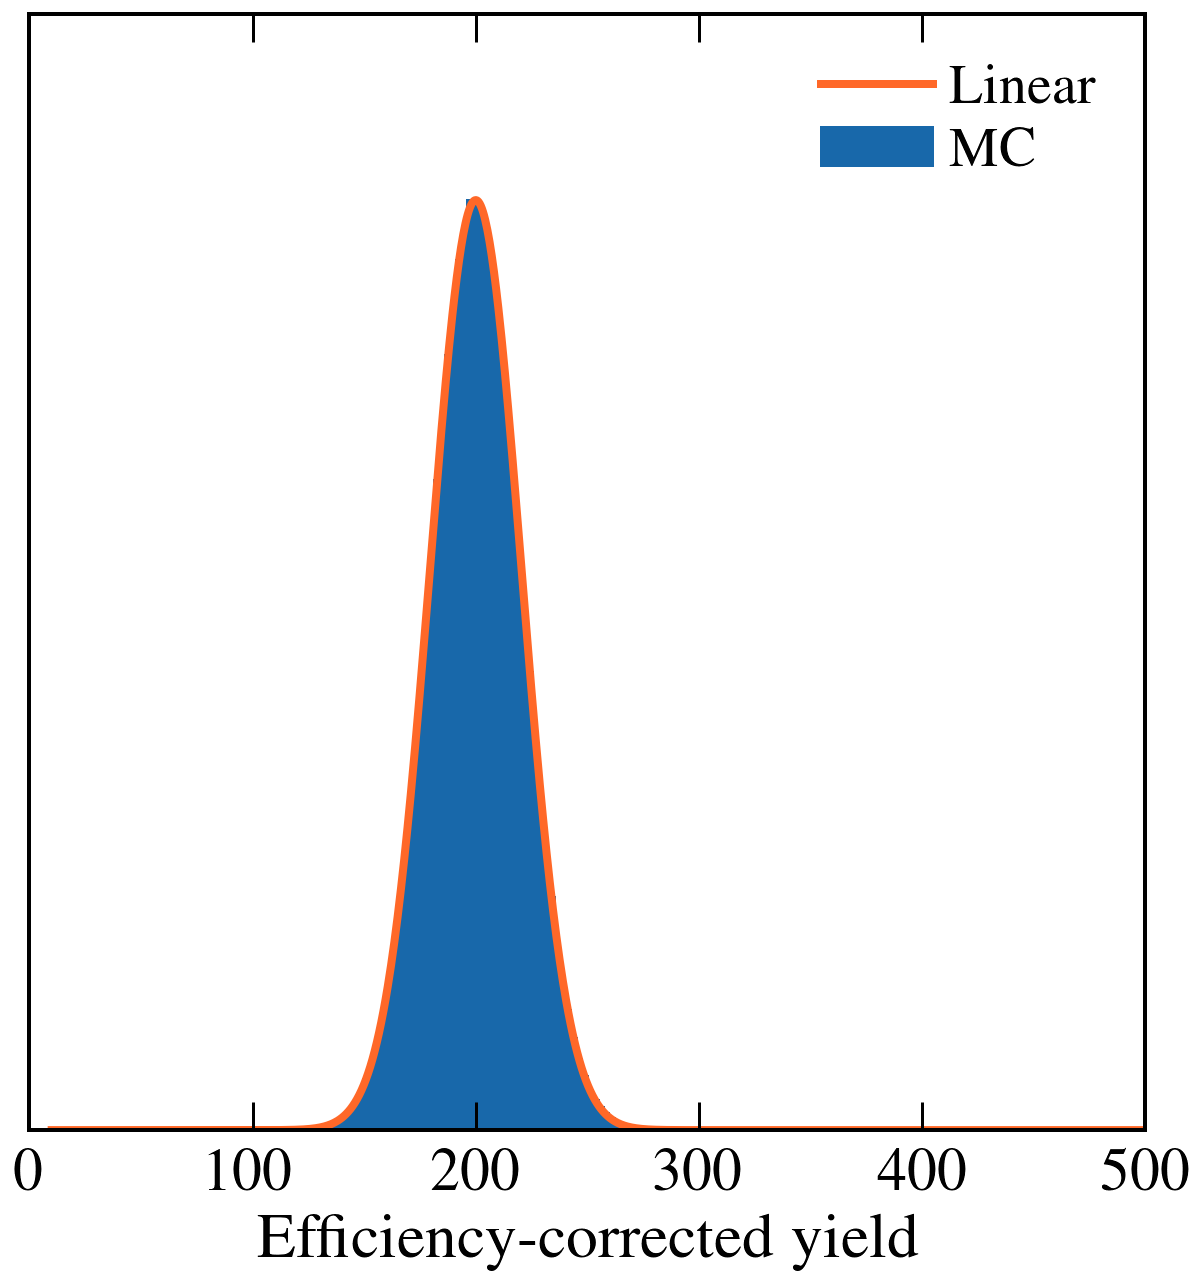

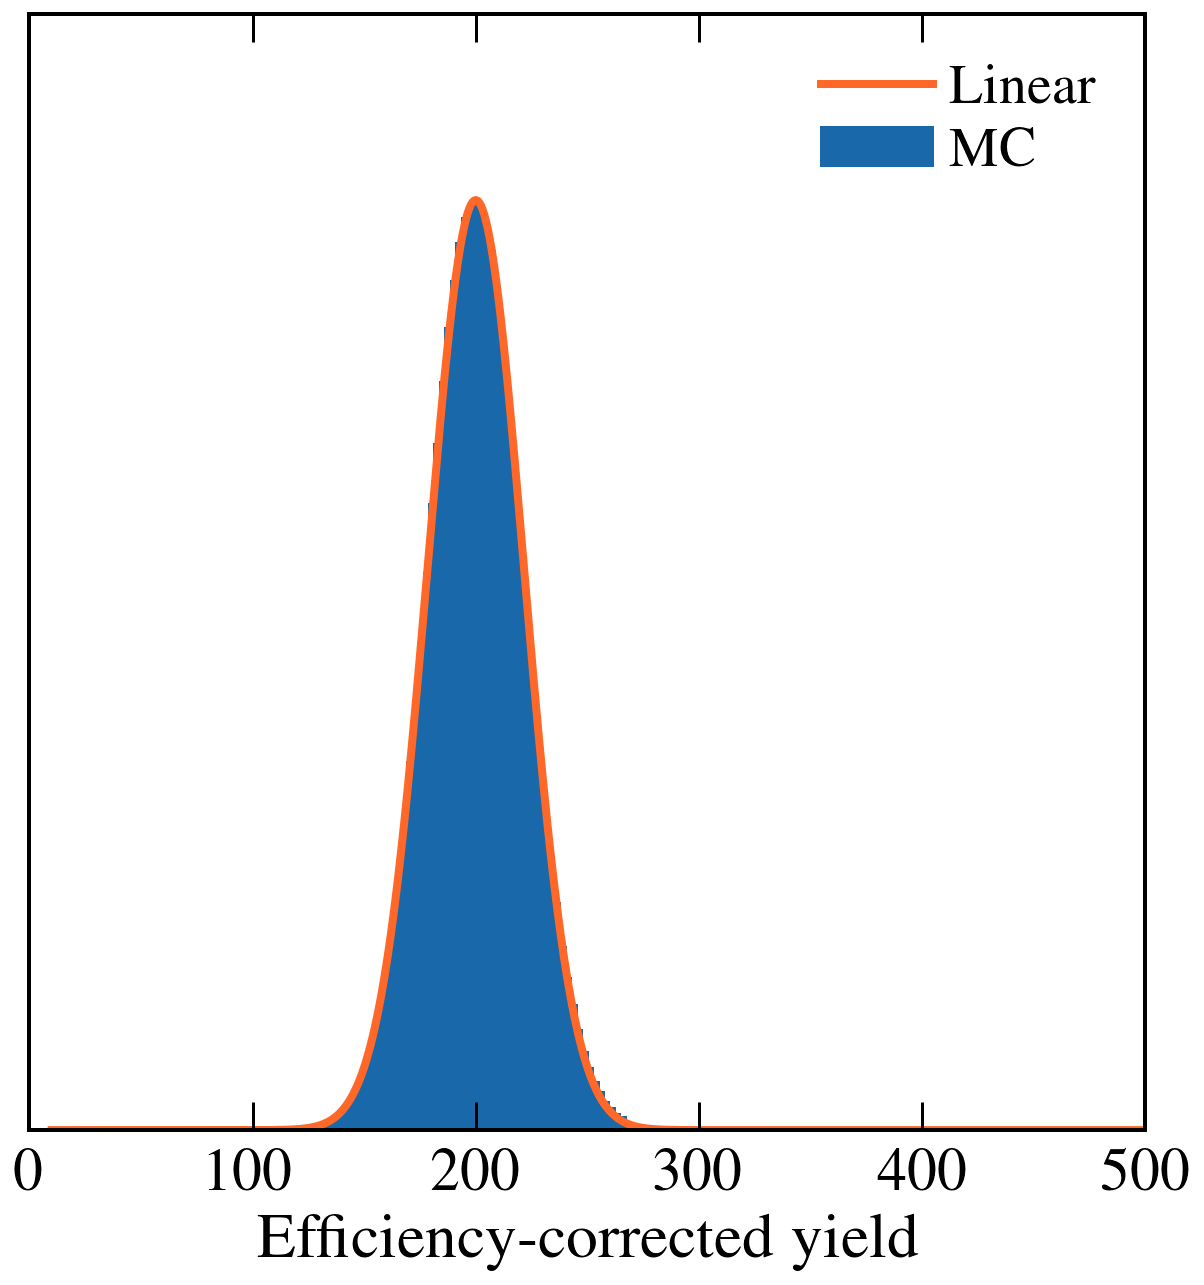

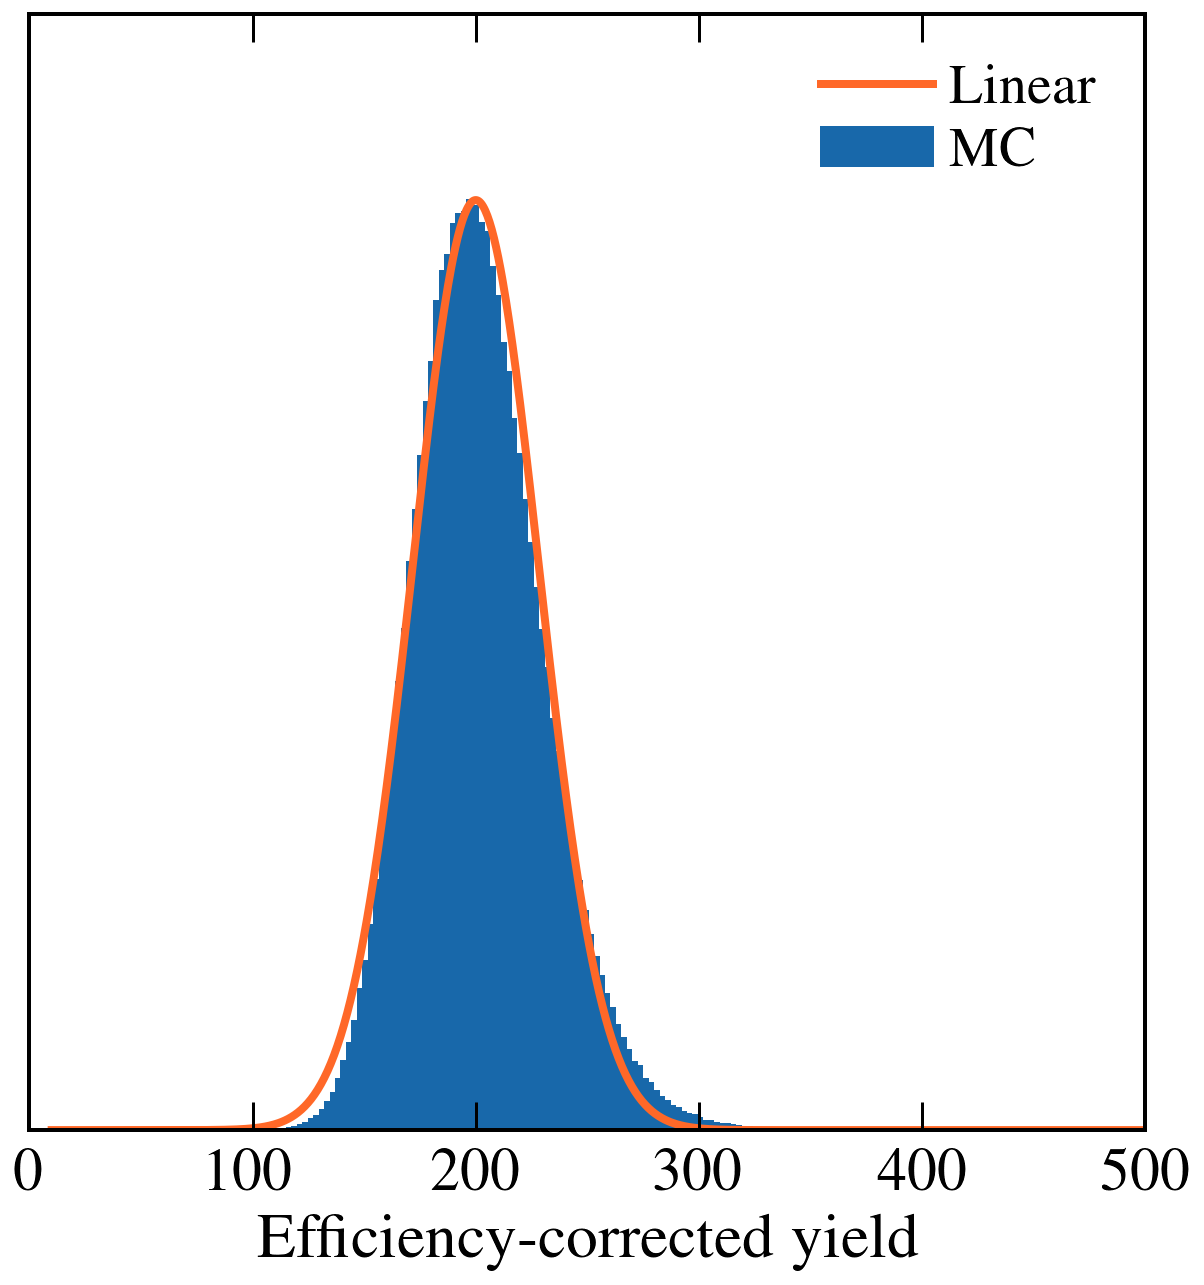

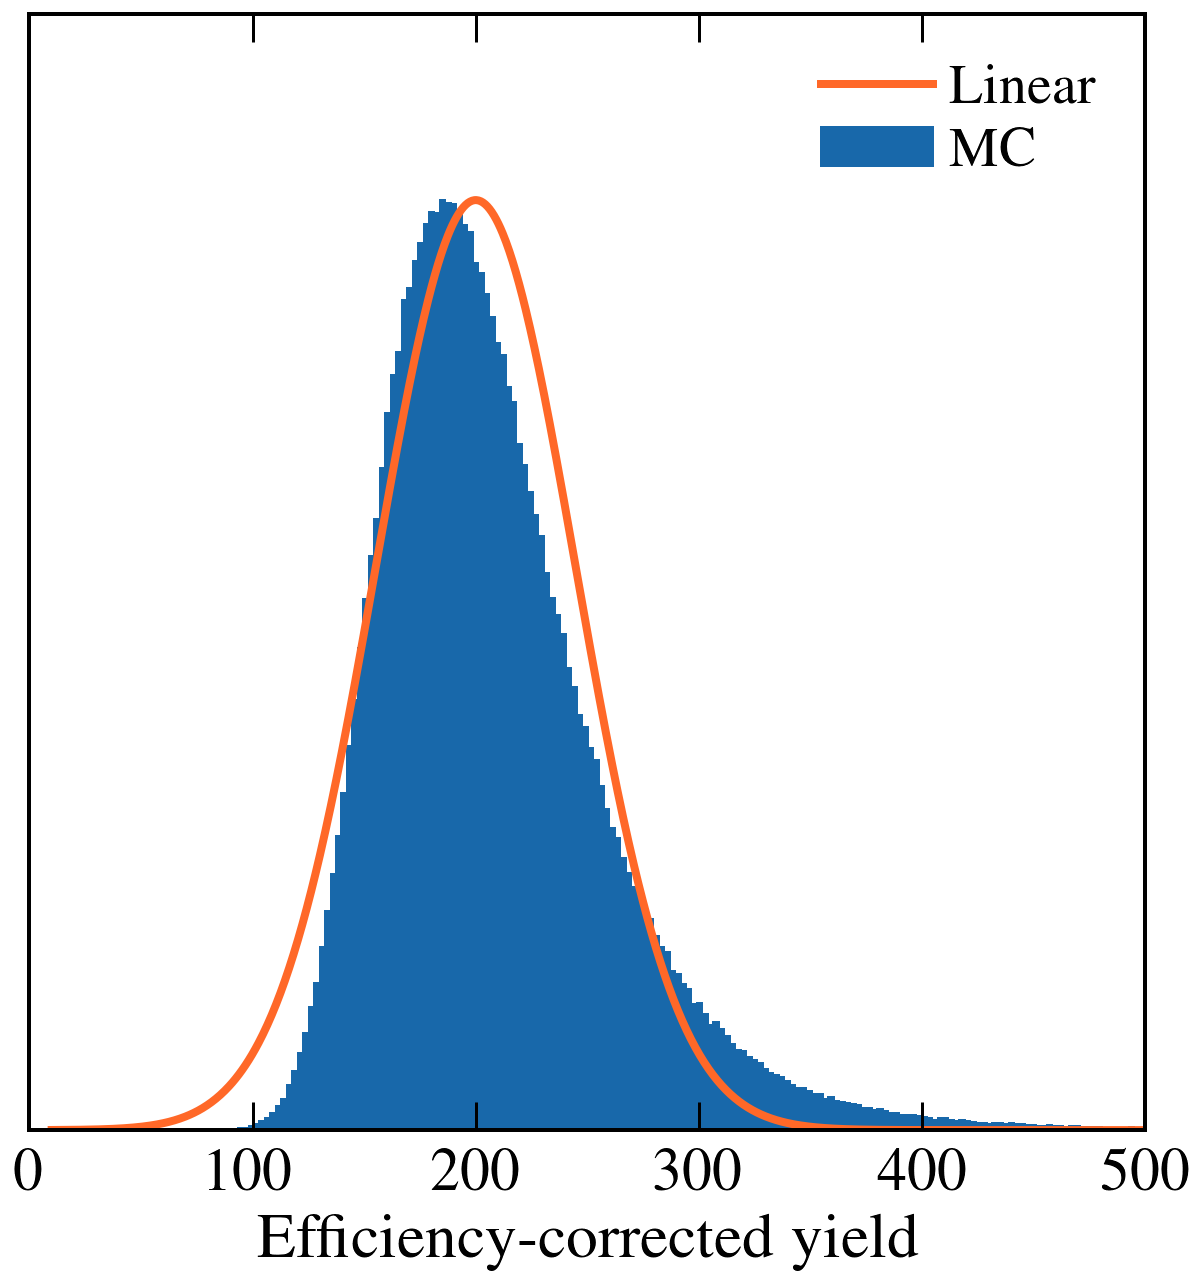

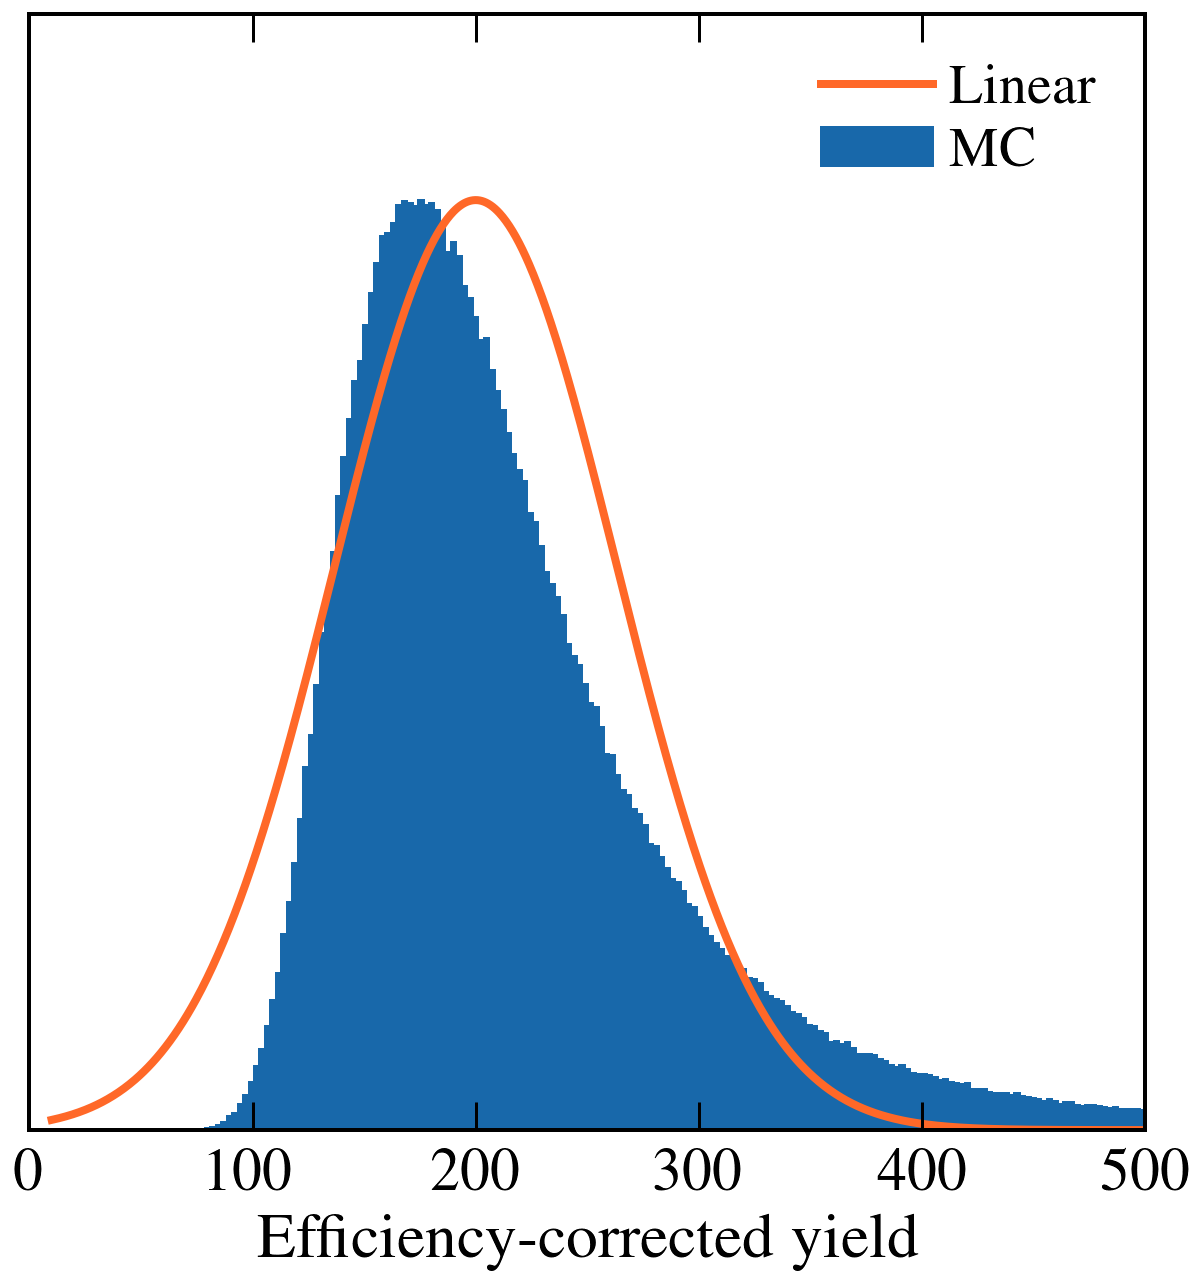

In [5]:

for unc in [0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.15]:
    eff = mc.N(0.5, unc)._mcpts
    vals = mc.N(100,10)._mcpts/eff
    a = lp.ufloat(0.5, unc)
    N = lp.ufloat(100, 10)
    val = N/a
    np.mean(vals)
    xs = np.linspace(10,500,1000)
    val.n, val.s
    nominal = g_pdf.pdf(xs, loc=val.n, scale=val.s)
    fig = plt.figure(figsize=(10,10))
    # ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    ax = fig.add_subplot(1,1,1)

    nominal /= np.max(nominal)

    cont, ctrs, width = make_hist(vals, range=(10., 500.), bins=200, density=True)
    ax.bar(ctrs, cont, width=width, label='MC', **style_bar);
    ax.plot(xs, nominal, label='Linear', **style2)
    ax.legend(loc='best')
    ax.set_ylim((0,1.2))
    ax.set_xlabel(r'Efficiency-corrected yield')

    ax.set_yticks([])
    fig.savefig('yield_over_eff_{}.pdf'.format(unc))

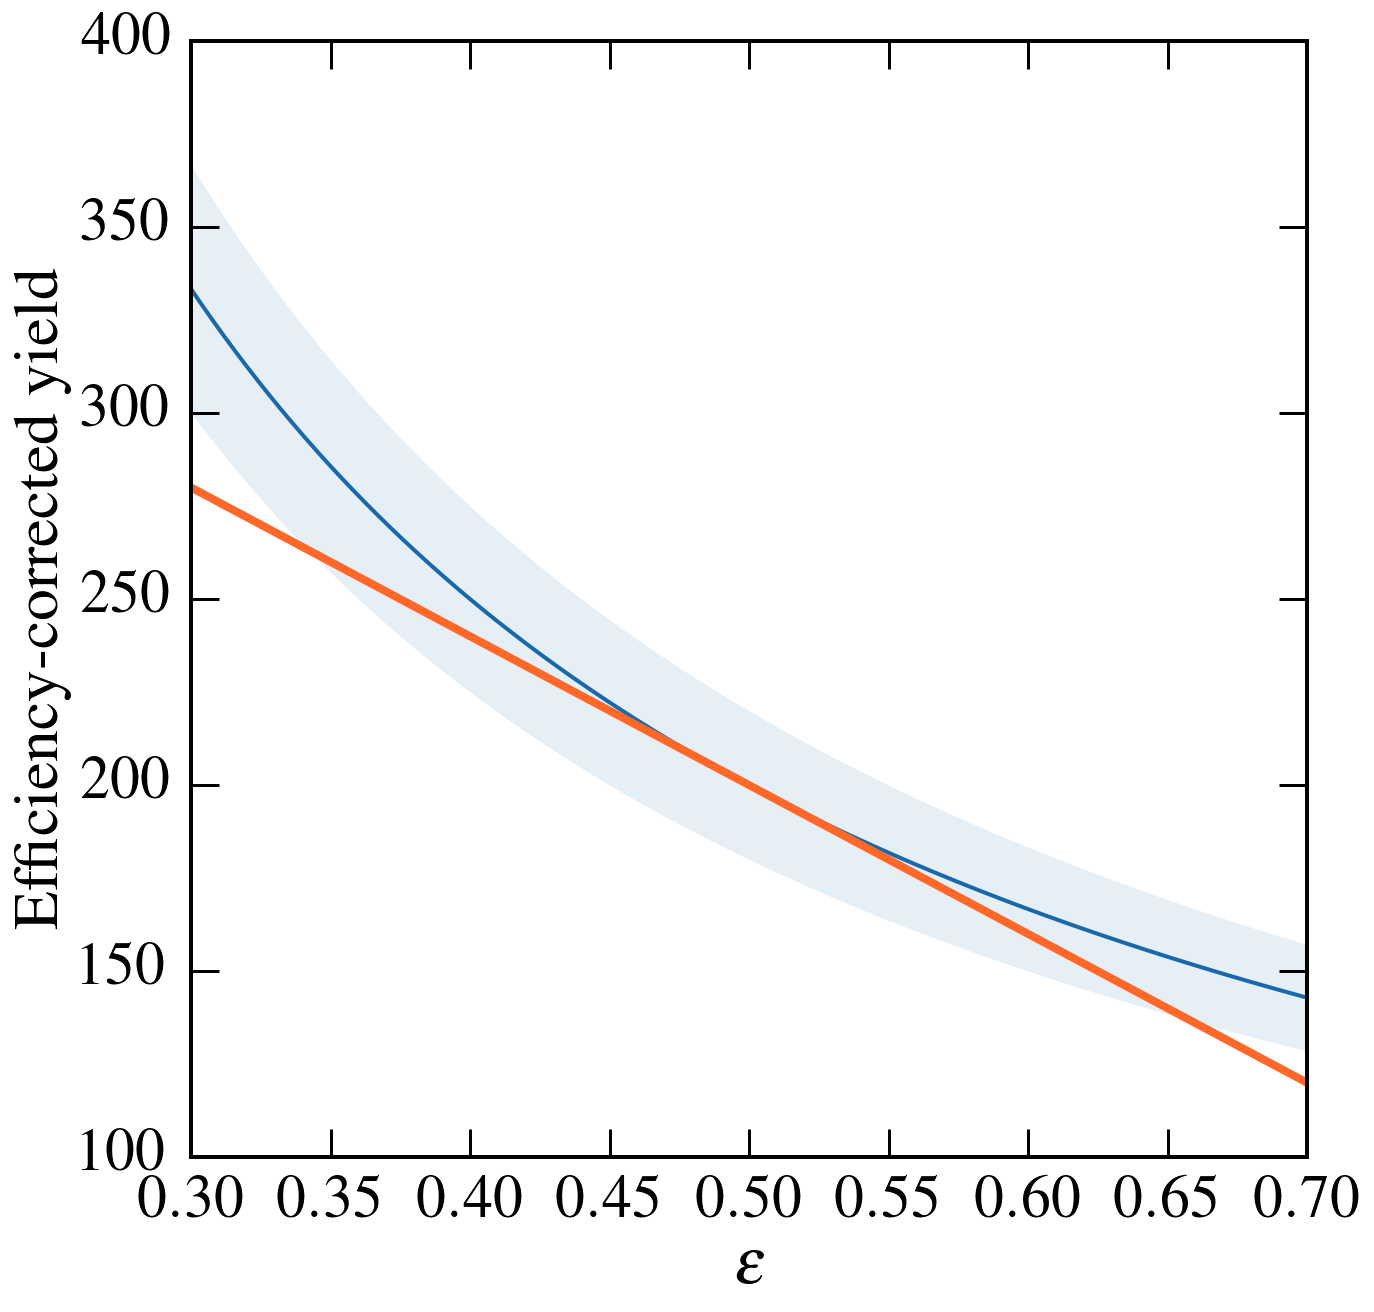

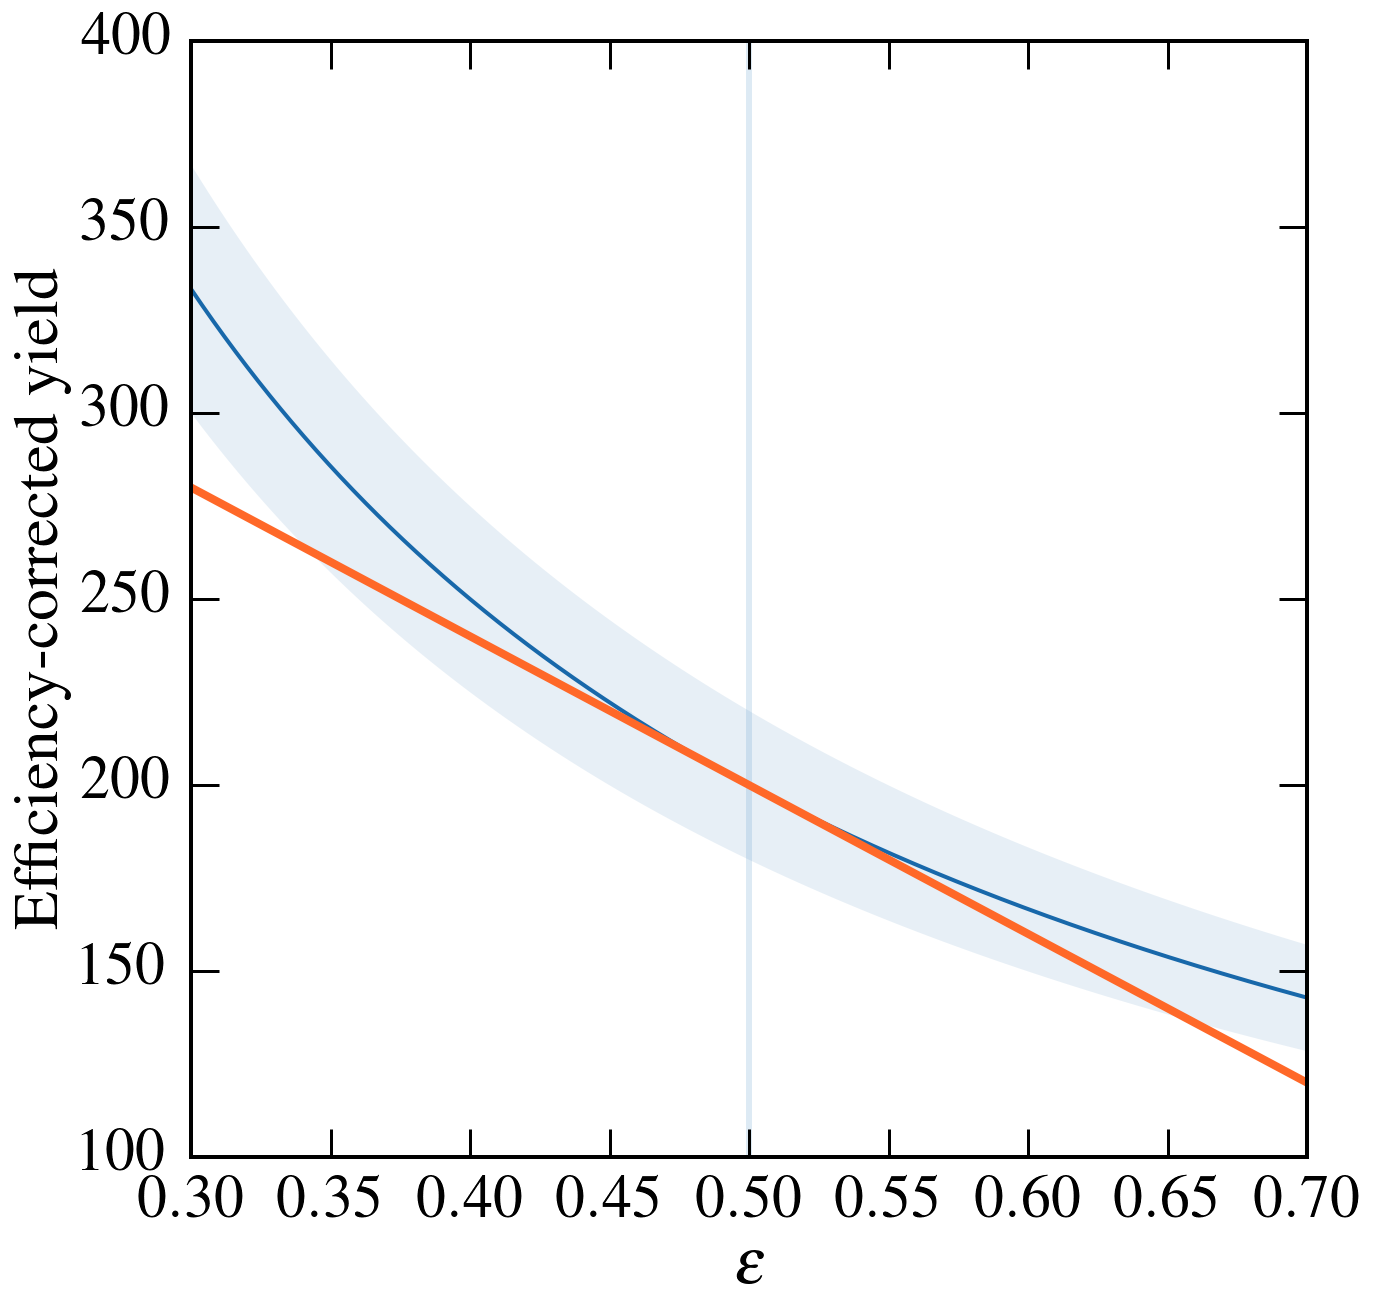

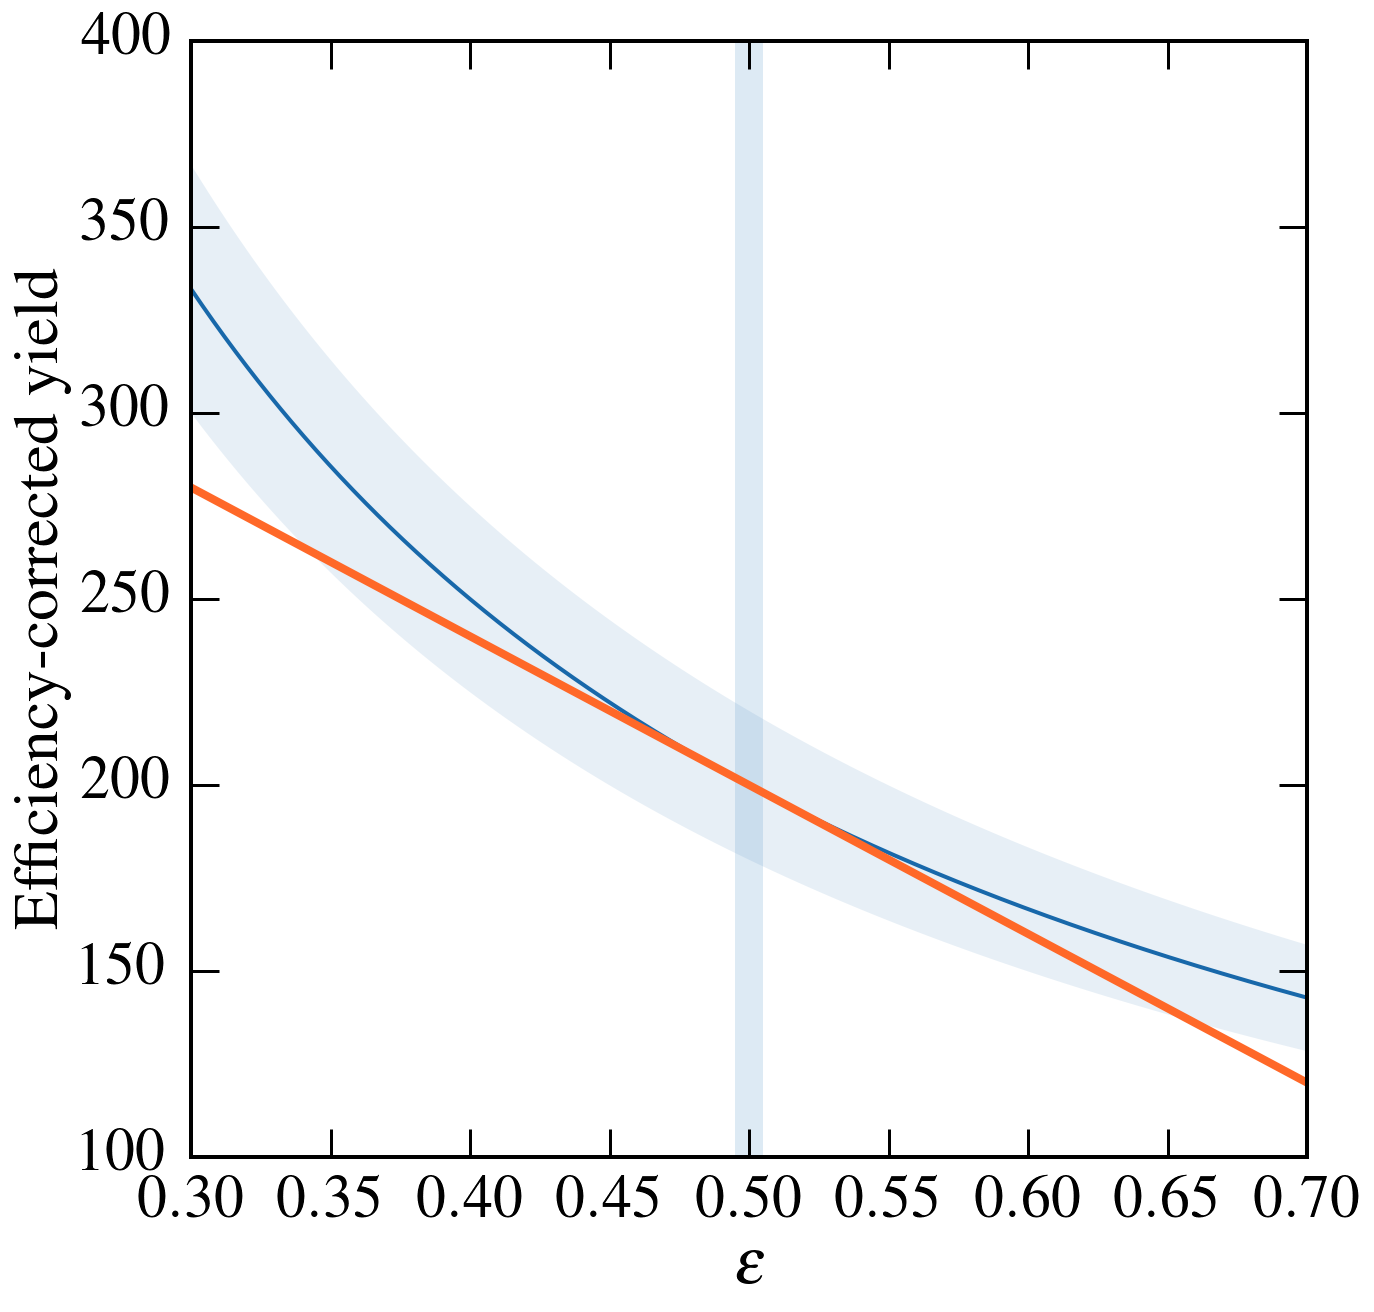

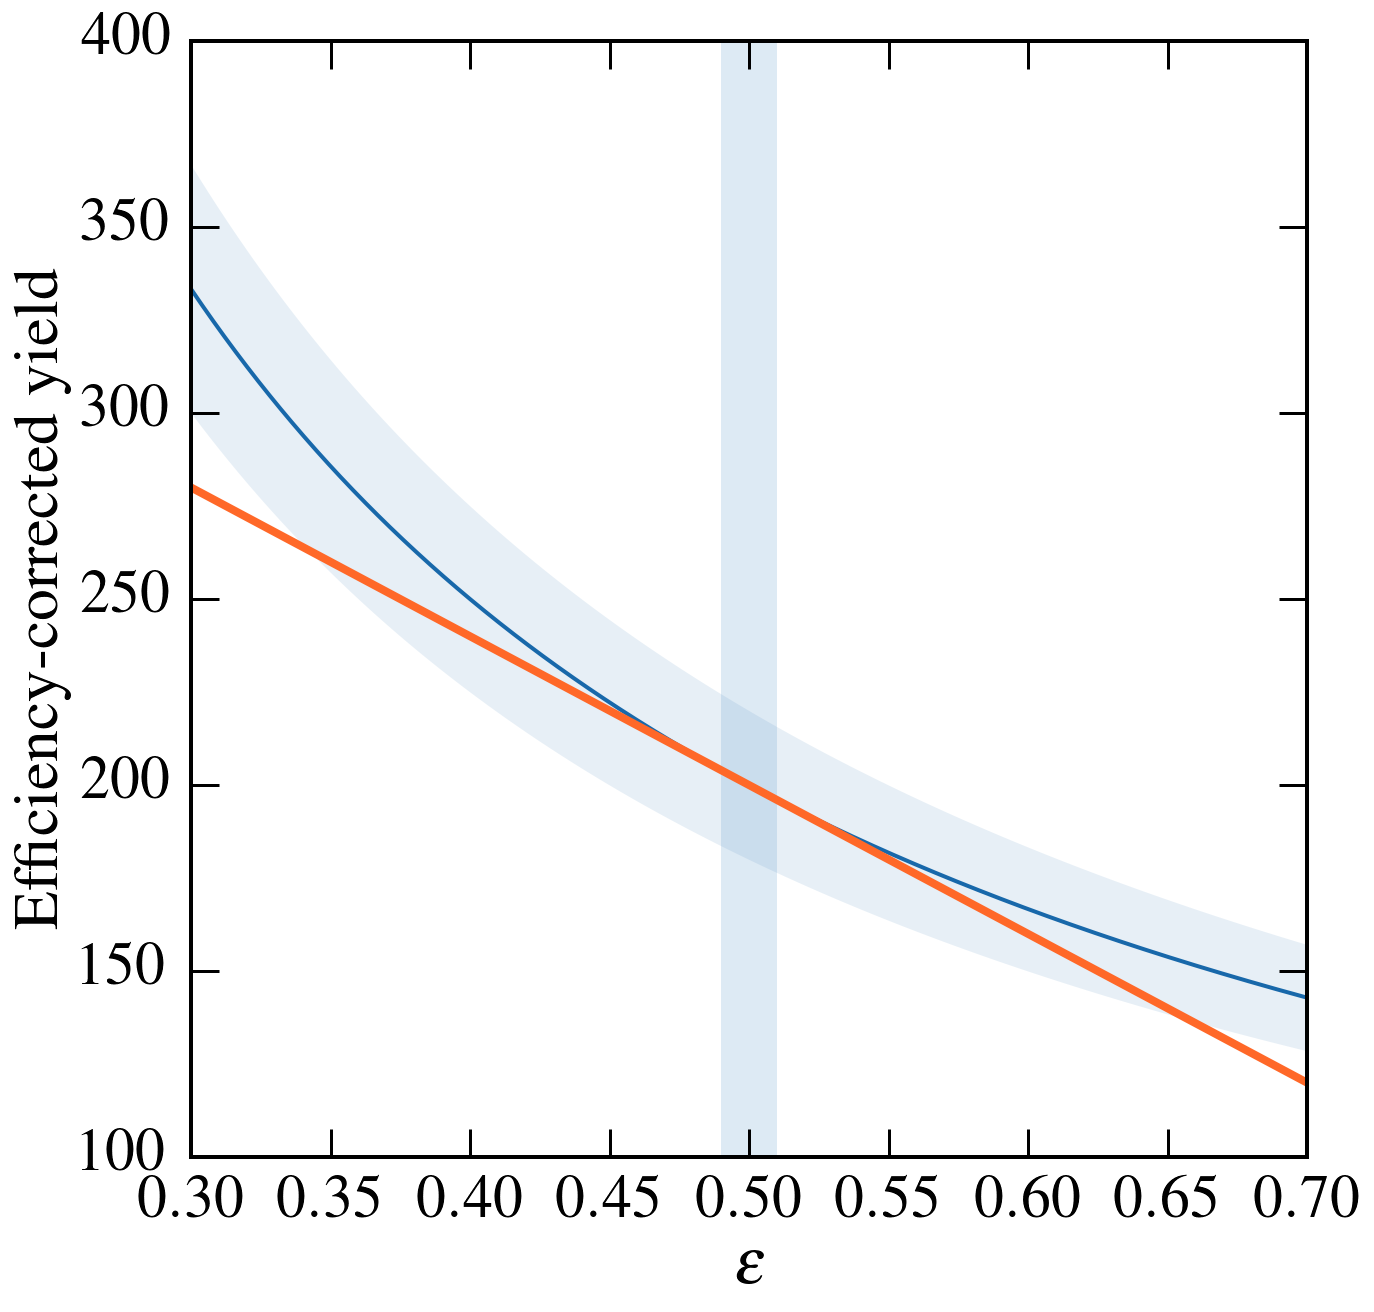

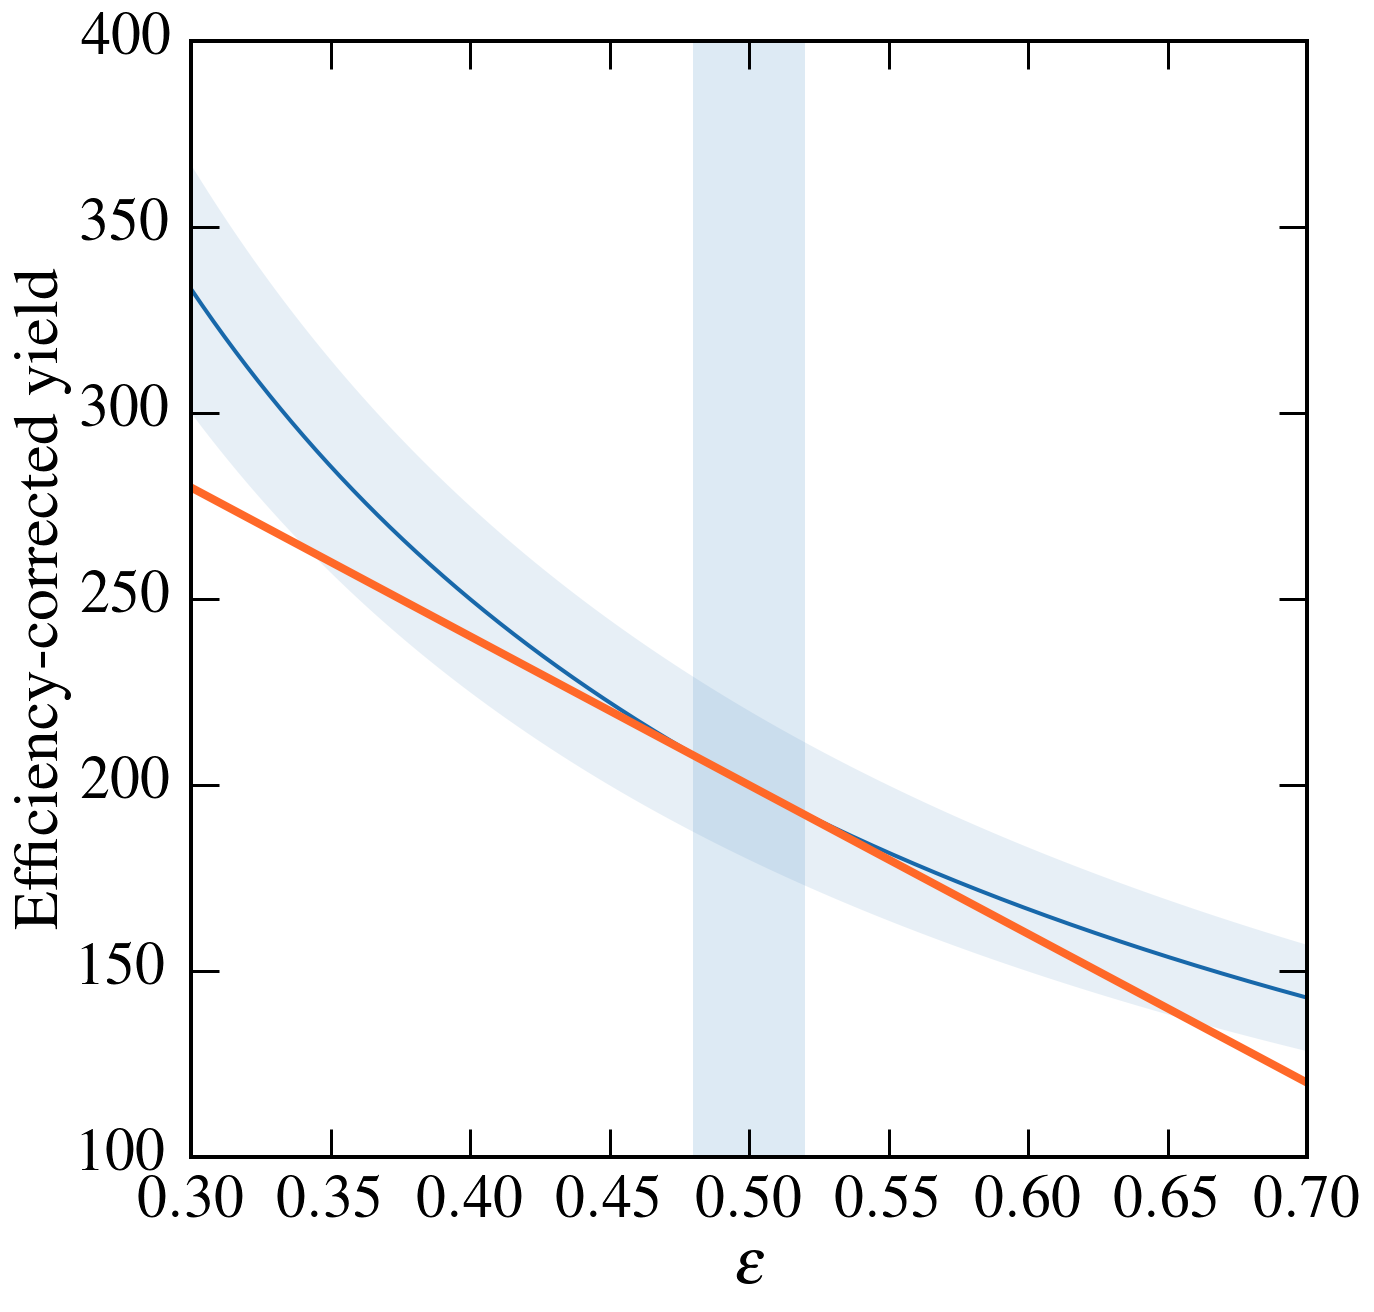

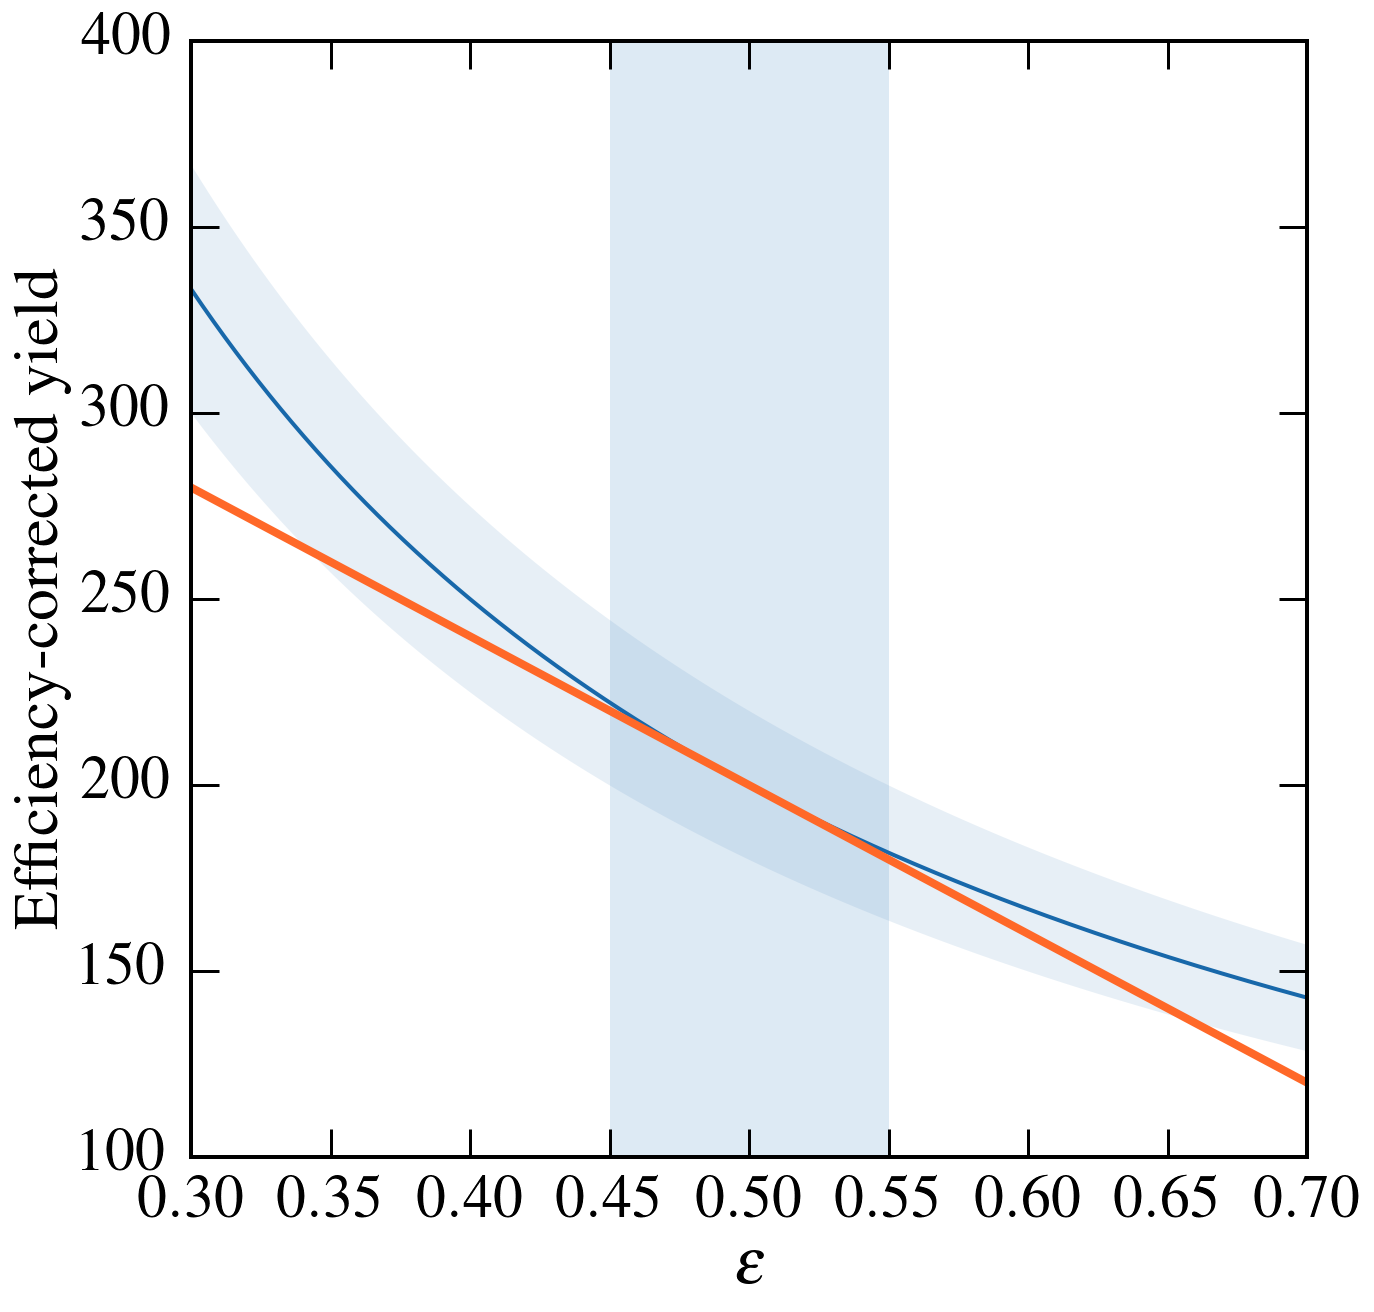

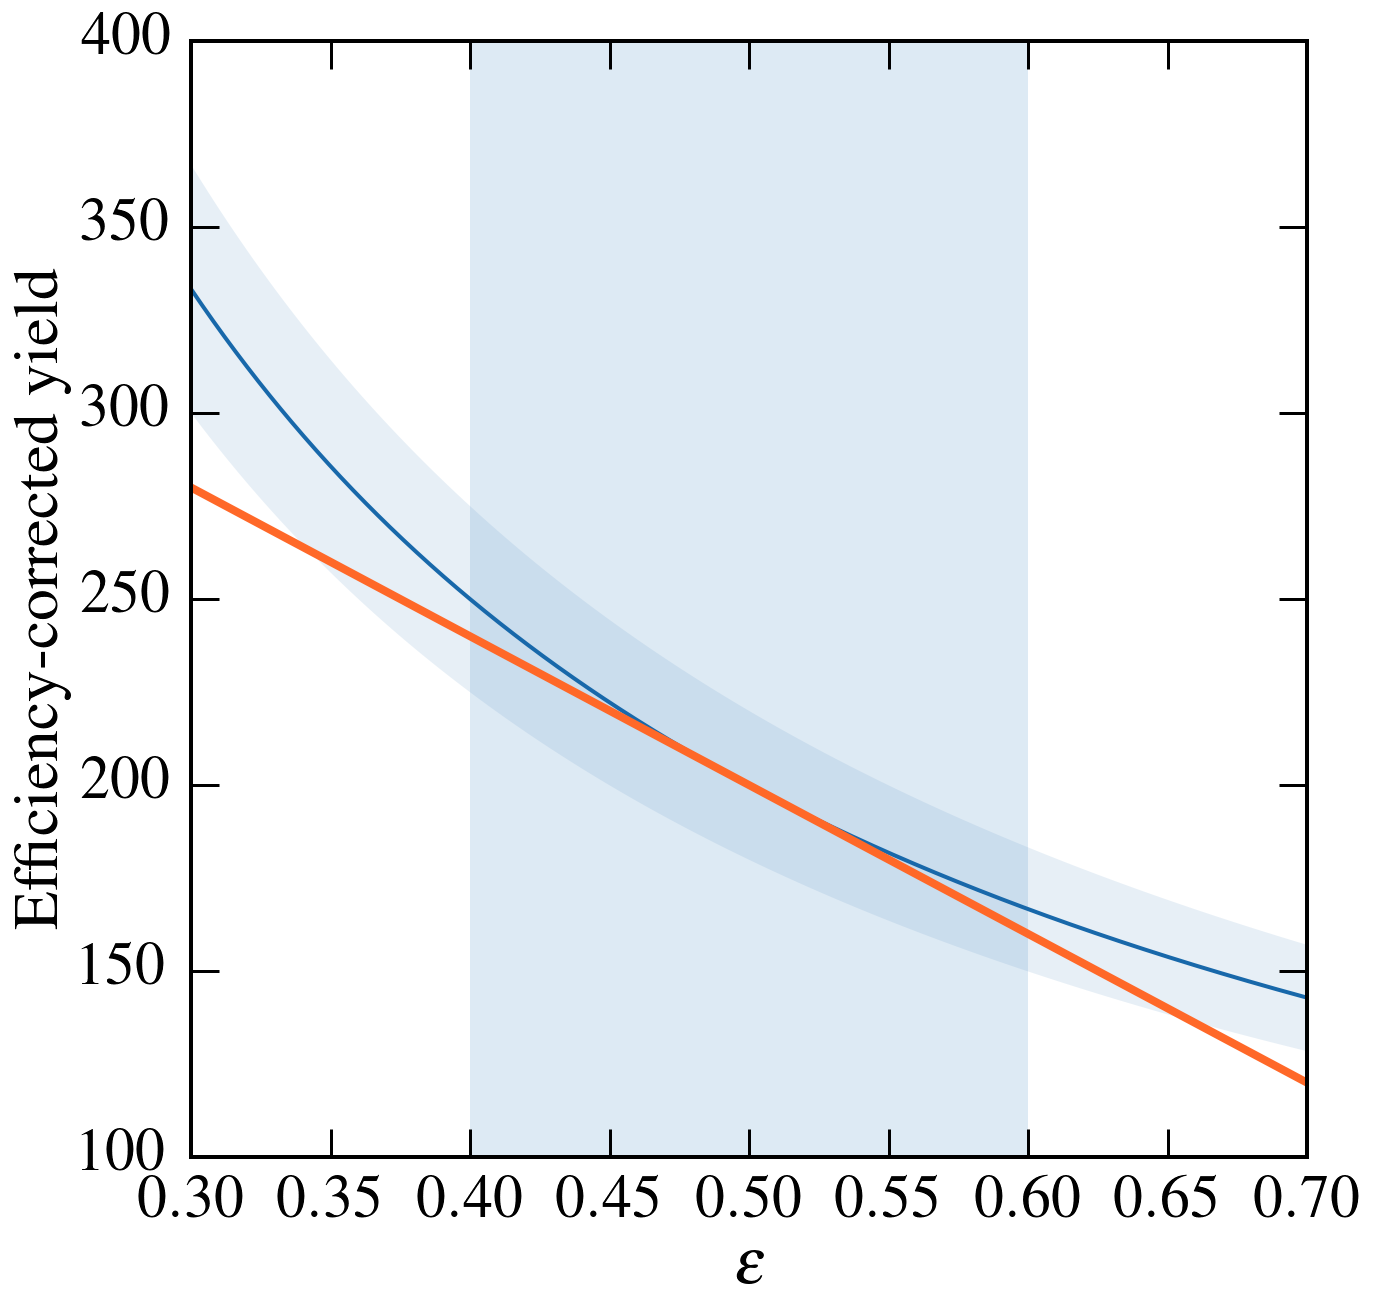

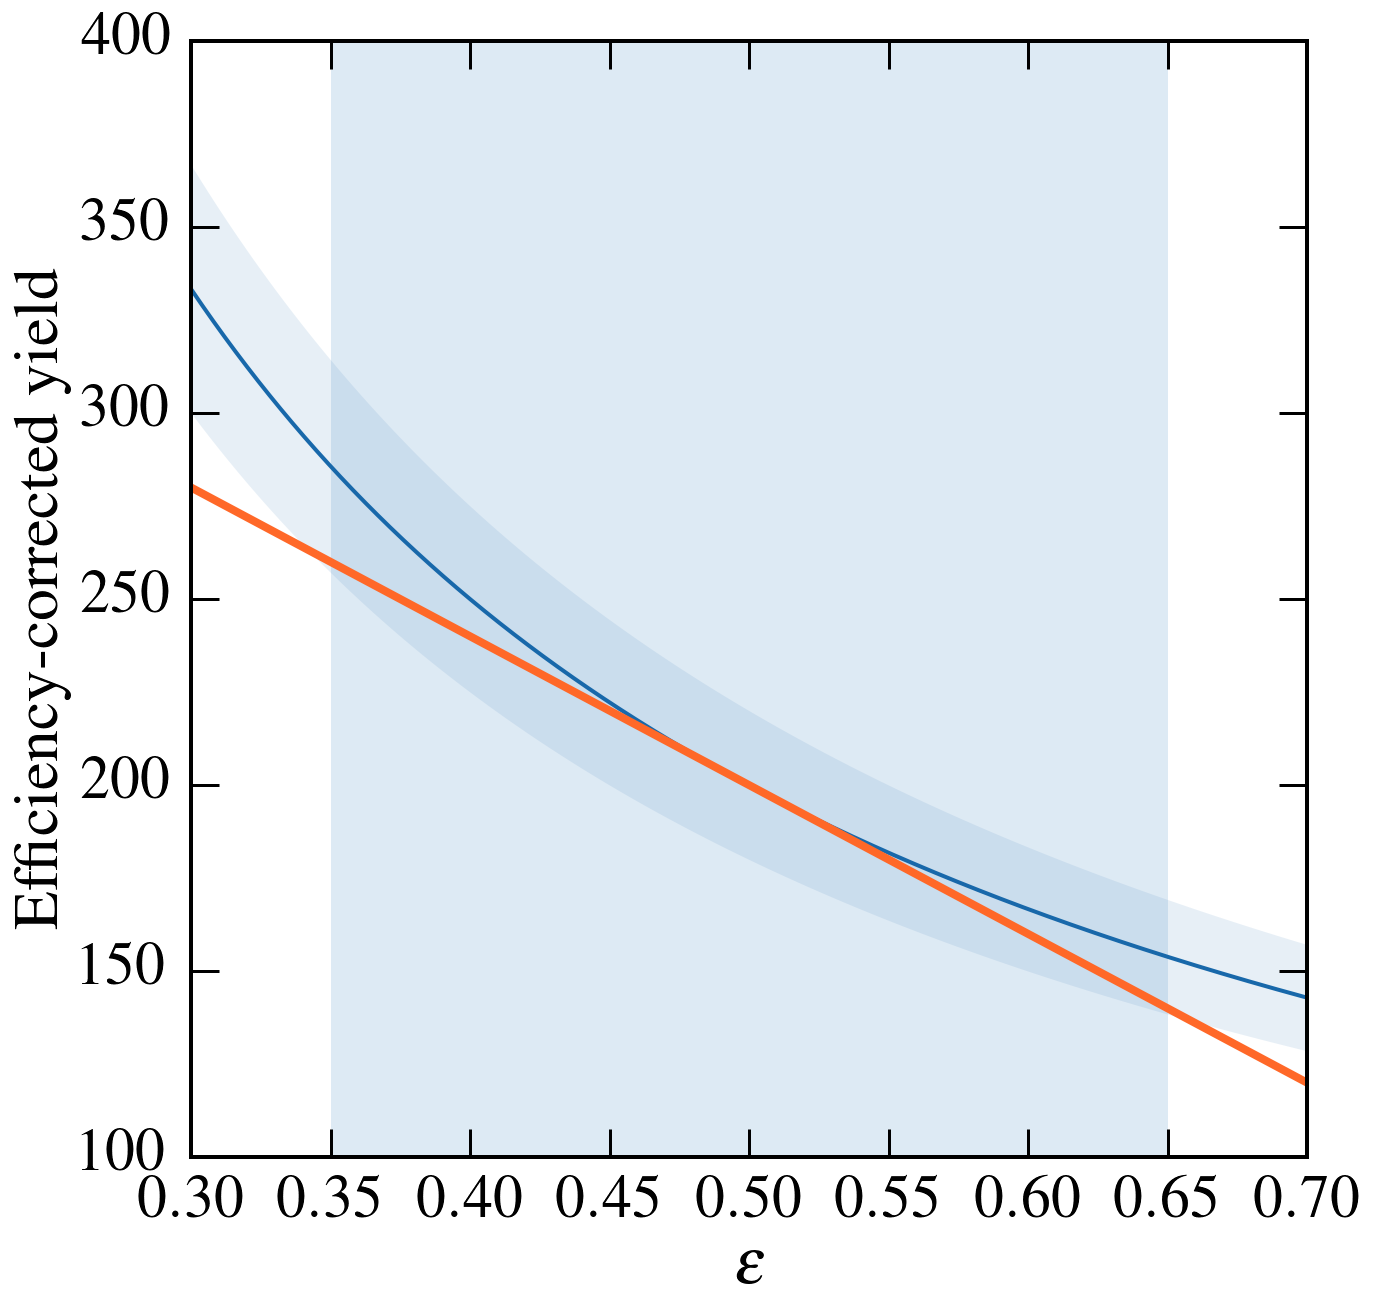

In [6]:
xs = np.linspace(0.3,0.7,1000)
straight=-200/0.5*xs + 400

min_NN = 90./xs 
max_NN = 110./xs
ctr_NN = 100./xs

unc = 0
for unc in [0, 0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.15]:
    fig = plt.figure(figsize=(10,10))
    # ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    ax = fig.add_subplot(1,1,1)
    ax.fill_between(xs, min_NN, max_NN, alpha=0.1, **style1)
    ax.plot(xs, ctr_NN, **style1line)
    ax.plot(xs, straight, alpha=1, **style2)
    ax.bar(0.5-unc, 400, width=2*unc, alpha=0.2, linewidth=0, color='#5796CA')
    ax.set_ylabel(r'Efficiency-corrected yield')
    ax.set_xlabel(r'$\varepsilon$')
    ax.set_xlim((0.3, 0.7))
    ax.set_ylim((100,400))
    fig.savefig('yield_over_eff_func_{}.pdf'.format(unc))

# $\sin(\phi)$ illustration

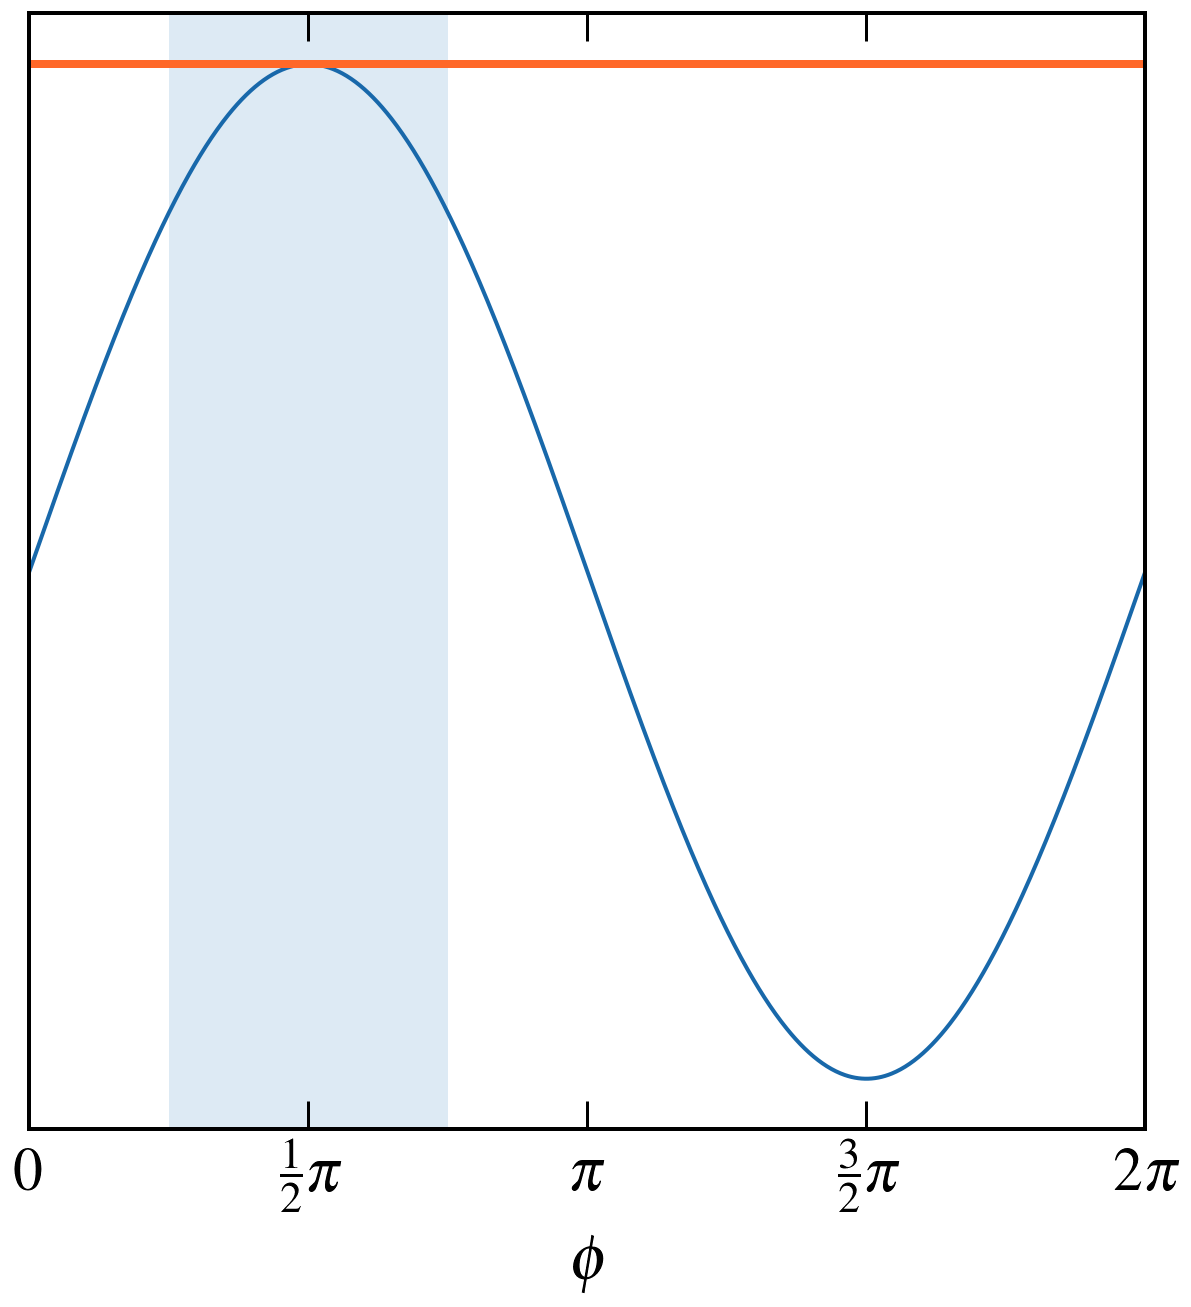

In [7]:
xs = np.linspace(0,2*np.pi, 1000)
ys = np.sin(xs)
unc = np.pi/4.
ctr = np.pi/2.
fig = plt.figure(figsize=(10,10))
# ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax = fig.add_subplot(1,1,1)
ax.plot(xs, ys, **style1line)
x_pi   = xs/np.pi
unit   = 0.5
x_tick = np.arange(0., 2.0+unit, unit)
x_label = [r"$0$", r"$\frac{1}{2}\pi$", r"$\pi$",r"$\frac{3}{2}\pi$", r"$2\pi$"]
ax.set_xticks(x_tick*np.pi)
ax.set_xticklabels(x_label)
ax.plot(xs, np.ones(len(xs)), alpha=1, **style2)
ax.bar(ctr-unc, 2.2, bottom=-1.1, width=2*unc, alpha=0.2, linewidth=0, color='#5796CA')
#ax.set_ylabel(r'$\sin(\phi)$')
ax.set_xlabel(r'$\phi$')
ax.set_yticks([])
ax.set_xlim((0, 2*np.pi))
ax.set_ylim((-1.1,1.1))
fig.savefig('sin_illustration.pdf')

# Non-Gaussian distributions

0.909090909091 +- 0.0866784172041
0.0964281540721
(0.80000391212917943, 0.97122886022962562)


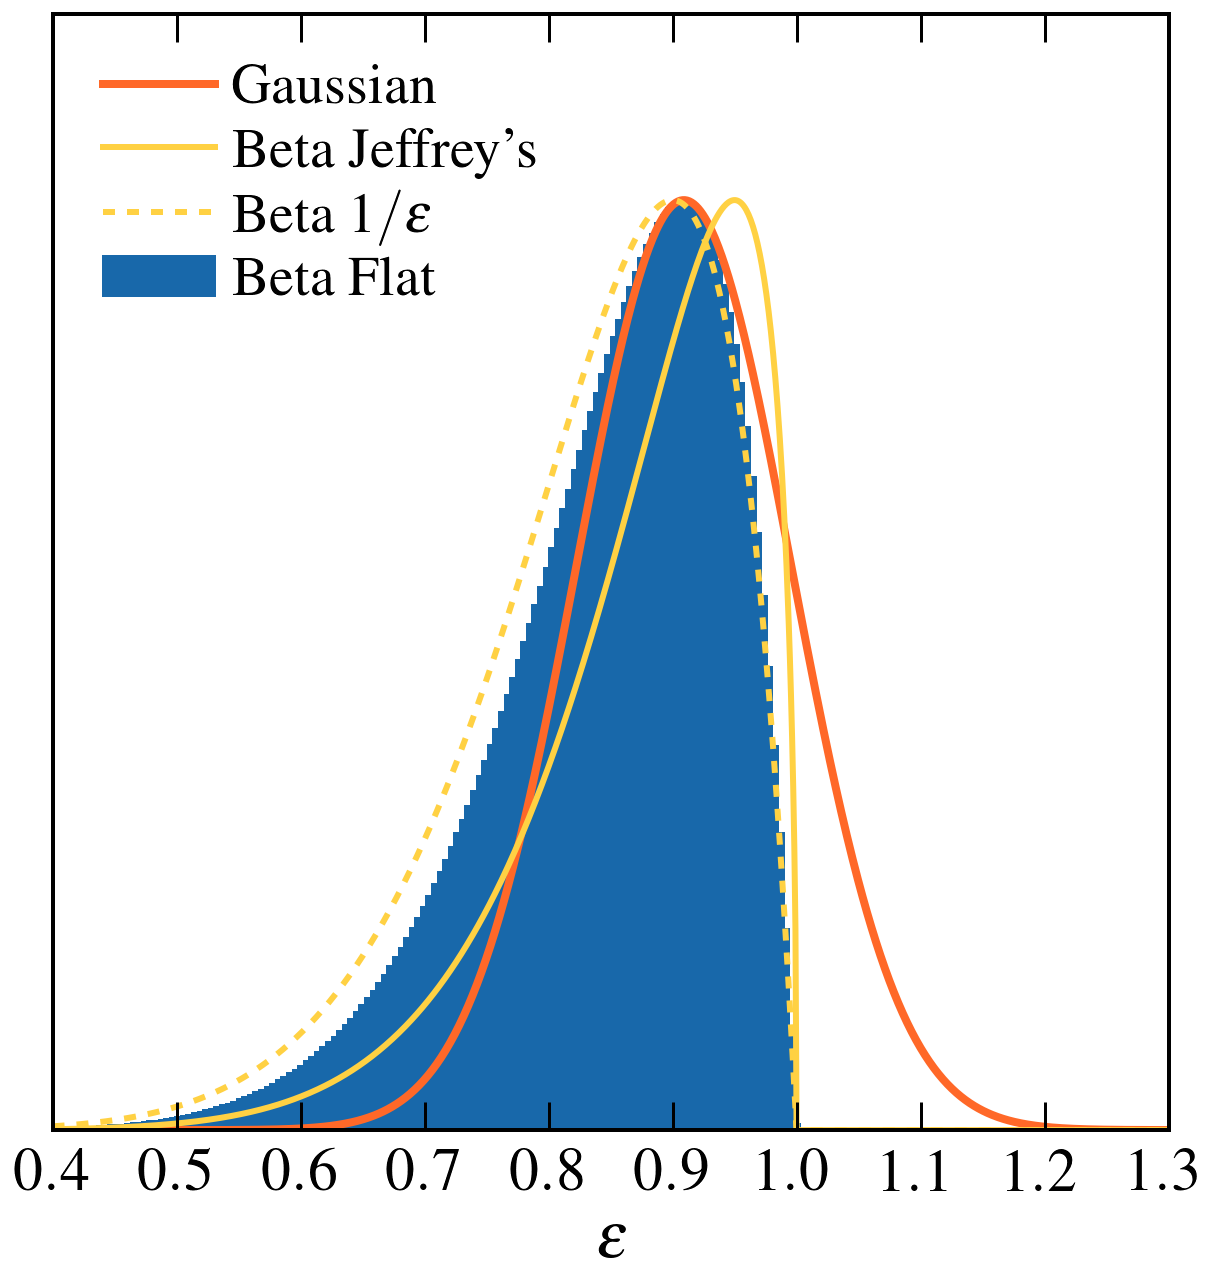

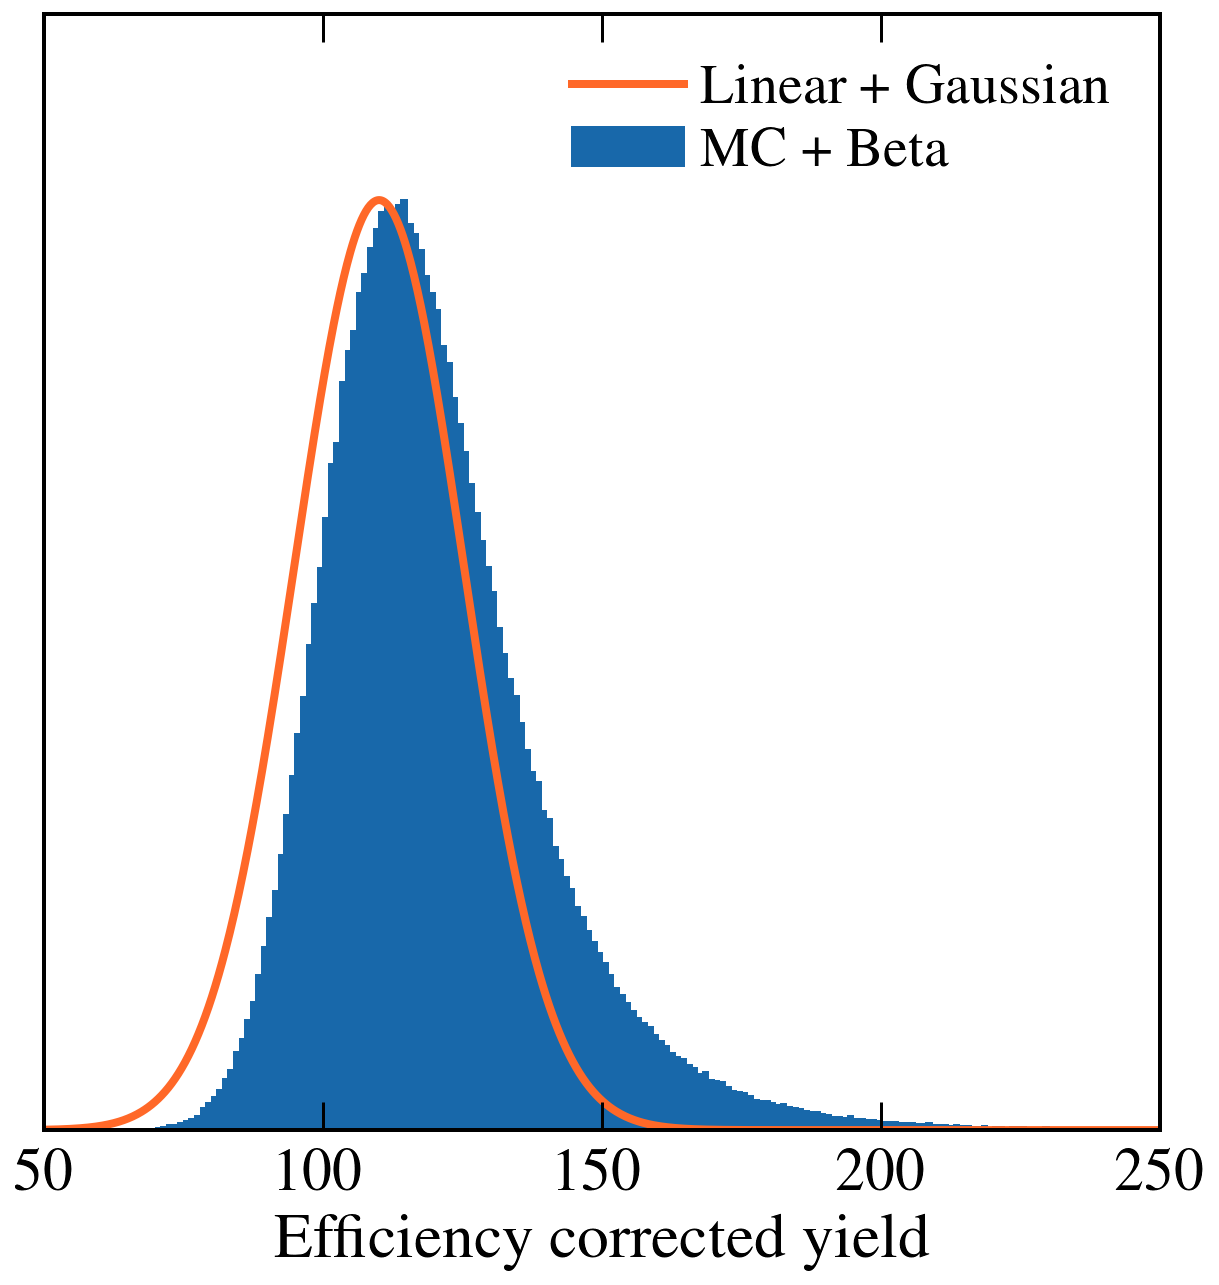

In [24]:
xs = np.linspace(0.4,1.3,1000)
passed = 10.
failed = 1.
eff_mpv = passed/(passed+failed)
binomial = np.sqrt(eff_mpv*(1.-eff_mpv)/(passed+failed))
print(eff_mpv, '+-', binomial)
beta_pdf = mc.Beta(passed+1, failed+1)
# jeffreys_pdf = mc.Beta(passed+0.5, failed+0.5)
# inverse_pdf = mc.Beta(passed, failed+1)

print(beta_pdf.std)
print(get_interval(beta_pdf._mcpts, mpv=eff_mpv))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
cont, ctrs, width = make_hist(beta_pdf._mcpts, range=(0.4,1.3), bins=200, density=True)
ax.bar(ctrs, cont, width=width, label='Beta Flat', **style_bar);
ys = g_pdf.pdf(xs, loc=eff_mpv, scale=binomial)
ys /= np.max(ys)
ax.plot(xs, ys, label='Gaussian', **style2)
ys = b_pdf.pdf(xs, passed+0.5, failed+0.5)
ys /= np.max(ys)
ax.plot(xs, ys, label='Beta Jeffrey\'s', **style_bar2)
ys = b_pdf.pdf(xs, passed, failed+1.0)
ys /= np.max(ys)
ax.plot(xs, ys, label=r'Beta $1/\varepsilon$', linestyle='--', **style_bar2)
ax.legend(loc='best')
ax.set_ylim((0,1.2))
ax.set_xlabel(r'$\varepsilon$')
ax.set_yticks([])
plt.savefig('beta_model.pdf')

# Compare both, again 100 +- 10
yield_mc = mc.N(100, 10)
yield_cl = lp.ufloat(100, 10)
eff_cl = lp.ufloat(eff_mpv, binomial)
result_mc = yield_mc/beta_pdf
result_cl = yield_cl/eff_cl

xs = np.linspace(50, 250, 1000)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
cont, ctrs, width = make_hist(result_mc._mcpts, range=(50.,250.), bins=200, density=True)
ax.bar(ctrs, cont, width=width, label='MC + Beta', **style_bar);
ys = g_pdf.pdf(xs, loc=result_cl.n, scale=result_cl.s)
ys /= np.max(ys)
ax.plot(xs, ys, label='Linear + Gaussian', **style2)
ax.legend(loc='best')
ax.set_ylim((0,1.2))
ax.set_xlabel(r'Efficiency corrected yield')
ax.set_yticks([])
plt.savefig('beta_model_propagation.pdf')

# Cross-section example

In [9]:
lumi = mc.N(160, 160*0.05)
br1, br2 = mc.N(0.04,0.001), mc.N(0.06, 0.003)
yield1, yield2 = mc.N(100,10), mc.N(144, 12)
eff_mpv1, eff_mpv2 = 70./100., 65./80.
eff_stat1 = mc.Beta(70+1, 30+1) - eff_mpv1
eff_stat2 = mc.Beta(65+1, 15+1) - eff_mpv1
eff_rel_syst = mc.N(1., 0.05)

xsec1 = yield1 / ((eff_mpv1 * eff_rel_syst + eff_stat1) * br1 * lumi)
xsec2 = yield2 / ((eff_mpv2 * eff_rel_syst + eff_stat2) * br2 * lumi)
print(np.corrcoef(xsec1._mcpts, xsec2._mcpts))


[[ 1.          0.26228186]
 [ 0.26228186  1.        ]]
